In [1]:
import pandas as pd

df_corr = pd.read_csv("../cl1.csv")

def qsplit(row):
    string = row.QUARTER
    Y = string[0:4]
    Q = string[4:]
    return Y,Q
df_corr["Y"] = df_corr.apply(lambda row: qsplit(row)[0], axis=1)
df_corr["Q"] = df_corr.apply(lambda row: qsplit(row)[1], axis=1)
df_corr = df_corr.drop(columns=["QUARTER","BIOGUIDE_ID","Unnamed: 0"],axis=1)

category = df_corr.CATEGORY.unique()
quarter = df_corr.Q.unique()
state = df_corr.state.unique()
party = df_corr.party.unique()
gender1 = df_corr.gender.unique()

p = [category, quarter, state]
name_index = ["CATEGORY", "Q", "state"]

for i in p:
    index= p.index(i)
    name = name_index[index]
    for col in i:
        df_corr[col] = 0
        df_corr.loc[df_corr[name] == col, col] = 1
              
df_corr.loc[df_corr.gender == "M", "gender"]= 1   
df_corr.loc[df_corr.gender == "F", "gender"]= 0

df_corr.loc[df_corr.party == "D", "party"]= 1   
df_corr.loc[df_corr.party == "R", "party"]= 0

/Users/arminkhayyer/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [3]:

required = [ 'AMOUNT', 'party', 'gender',
        'PERSONNEL COMPENSATION',"Q1", "Q2", "Q3","Q4"]

corr= df_corr[required].corr()
corr

,AMOUNT,party,gender,PERSONNEL COMPENSATION,Q1,Q2,Q3,Q4
AMOUNT,1.000000,0.009414,-0.003120,0.956910,-0.010858,-0.012064,-0.006879,0.030076
party,0.009414,1.000000,-0.250431,0.000534,0.005931,0.004517,-0.008045,-0.002751
gender,-0.003120,-0.250431,1.000000,-0.000272,0.002393,0.000691,-0.002654,-0.000557
PERSONNEL COMPENSATION,0.956910,0.000534,-0.000272,1.000000,-0.001807,-0.002099,-0.000590,0.004552
Q1,-0.010858,0.005931,0.002393,-0.001807,1.000000,-0.351058,-0.337927,-0.349322
Q2,-0.012064,0.004517,0.000691,-0.002099,-0.351058,1.000000,-0.317226,-0.327924
Q3,-0.006879,-0.008045,-0.002654,-0.000590,-0.337927,-0.317226,1.000000,-0.315658
Q4,0.030076,-0.002751,-0.000557,0.004552,-0.349322,-0.327924,-0.315658,1.000000


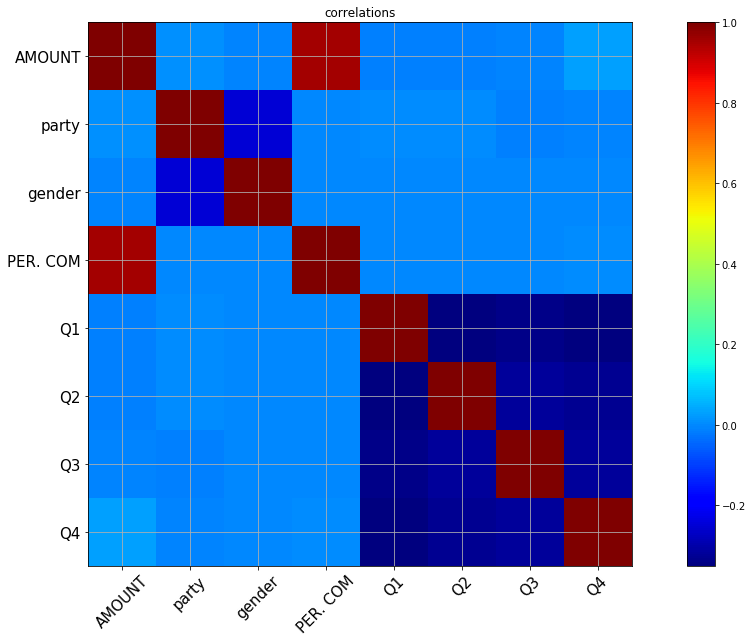

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from matplotlib import cm as cm


required = [ 'AMOUNT', 'party', 'gender',
        'PERSONNEL COMPENSATION',"Q1", "Q2", "Q3","Q4"]
corr= df_corr[required].corr()

fig , ax = plt.subplots(figsize=(20, 10)) 

cmap = cm.get_cmap('jet')
cax = ax.imshow(corr, interpolation="nearest", cmap=cmap)
ax.grid(True)

labels=[ "",'AMOUNT', 'party', 'gender',
        'PER. COM',"Q1", "Q2", "Q3","Q4"]

ax.set_xticklabels(labels ,fontsize=15, rotation=45)
ax.set_yticklabels(labels,fontsize=15)

plt.title('correlations')
fig.colorbar(cax)
plt.show()
